| **Onderdeel**       | **Inhoud** |
|----------------------|------------|
| 📘 **Titel** | Statistics for Data Science — Deel 2: Voorspellend model universiteitsdata |
| 👤 **Auteur** | `Adil Vural` & `Oktay Doğan`|
| 🏛️ **Instelling** | Erasmus Q-Intelligence |
| 🗓️ **Datum / Versie** | 10 oktober 2025 — Versie 1.1 |
| 🧾 **Bestand** | Opdracht_2_obv_universiteitsdata_final.ipynb |
| 🧮 **Dataset** | college_statistics.csv |
| 🧠 **Doel** | Ontwikkelen van een voorspellend model voor het aantal aanmeldingen (`Apps`) op basis van factoren die vooraf bekend zijn. |
| 🔍 **Analyse-onderdelen** | 1️⃣ Beschrijvende statistiek<br>2️⃣ Lineaire en log-regressie<br>3️⃣ Modelselectie (AIC, R², RMSE)<br>4️⃣ Diagnostiek (QQ-plot, BP-test, DW, VIF, Cook’s D)<br>5️⃣ Vergelijking basismodel vs. uitgebreid model<br>6️⃣ Conclusie & interpretatie |
| 📚 **Bronnen** | *Practical Statistics for Data Scientists* (2e editie)<br>Lecture 1–5 — Erasmus “Statistics for Data Science” 2025-2026 |


## 1. Opdracht deel 2 — op basis van universiteitsdata

<small>
Maak een model dat het **aantal aanmeldingen** kan voorspellen op basis van factoren die **voorafgaand** aan het binnenkomen van de aanmeldingen beschikbaar zijn.  
Gebruik **geen** variabelen <span style="color:red">`Accept`</span> en <span style="color:red">`Enroll`</span>: deze zijn **gevolgen** (en geen oorzaken) van het aantal aanmeldingen. Volg hierbij de onderstaande stappen.

**(a) Normaliteit testen**  
Voer een test uit voor de hypothese dat het aantal aanmeldingen een **normale verdeling** volgt.  
Wat is je **conclusie**? Is deze conclusie van belang voor het **verdere modelleren** van deze variabele?

**(b) Train–test verdeling**  
Deel de data **willekeurig** op in een “estimation” (train) en “test” sample.  
Neem **600 universiteiten** in de estimation sample.  
Zorg ervoor dat deze opdeling **reproduceerbaar** is. 

<span style="color:red"> 
*Hint (Python):* gebruik </span> <span style="color:green">`random.seed`</span> en <span style="color:green">`pandas.DataFrame.sample`</span> (of <span style="color:green">`train_test_split`</span>).  


**(c) Lineair basismodel (<span style="color:green">Apps</span>)**  
Maak eerst een **lineair model** voor het aantal aanmeldingen met uitsluitend de **estimation sample**.

**(d) Variabelenselectie (backward elimination)**  
Pas **backward elimination** toe om het aantal variabelen terug te brengen.

**(e) Aannames toetsen (lineair model)**  
Voer verschillende toetsen en controles uit om de **aannames** van het lineaire model te beoordelen  
(lineariteit, homoscedasticiteit, normaliteit van residuen, onafhankelijkheid, multicollineariteit, invloedrijke punten).

**(f) Logaritmisch model**  
Maak vervolgens een model voor de **logaritme** van het aantal aanmeldingen  
(ook met **backward elimination**).

**(g) Aannames opnieuw toetsen (log-model)**  
Herhaal de toetsen en controles van stap (e) voor het logaritmische model.

**(h) Modelkeuze**  
Kies welk van de twee modellen **de voorkeur** heeft en **motiveer** waarom  
(bijvoorbeeld op basis van fit, aannames, interpretatie en voorspellingsprestaties).

**(i) Verbeteringen en transformaties**  
Probeer het gekozen model verder te **verbeteren**.  
Denk aan het toevoegen van **transformaties** en **interacties** van verklarende variabelen, of aanpassingen om aannames beter te laten gelden.

**(j) Interpretatie van coëfficiënten**  
Leg **precies** uit hoe de coëfficiënten in het **uiteindelijke model** geïnterpreteerd moeten worden.  
Welke factoren zijn uiteindelijk het **belangrijkst**?  
Bijvoorbeeld: <span style="color:green">`Top10perc`</span>, <span style="color:green">`Room_Board`</span>, <span style="color:green">`Expend`</span>, <span style="color:green">`Grad_Rate`</span>, <span style="color:green">`PhD`</span>, <span style="color:green">`Private`</span>.

**(k) Voorspellingen maken**  
Gebruik het uiteindelijke model om **voorspellingen** te maken voor de waarnemingen  
in de **estimation**- en **test**-samples.

**(l) Vergelijk voorspelkracht**  
Vergelijk de **voorspelkracht** (met behulp van de **gemiddelde kwadratische fout – Mean Squared Error (MSE)**)  
van het model op de estimation sample met die op de test sample.  
Wat concludeer je?
</small>



## Doel en Aannames

<small>
Doel van de analyse
Het doel van deze opdracht is om een `voorspellend model` te ontwikkelen dat het **aantal aanmeldingen** (`Apps`) bij universiteiten verklaart en voorspelt.  
Hiervoor worden uitsluitend **kenmerken gebruikt die vooraf bekend zijn**, dus variabelen die een invloed kunnen hebben op het aantal aanmeldingen, maar daar niet van afhankelijk zijn.  
De variabelen `Accept` en `Enroll` worden bewust **niet** opgenomen, omdat deze het resultaat zijn van het aantal aanmeldingen en dus **gevolgvariabelen** zijn.  

Het model wordt stap voor stap opgebouwd volgens de onderdelen 5a tot en met 5l.  
Daarbij wordt gewerkt met:  
- een **basismodel** met een beperkt aantal verklarende variabelen, en  
- een **uitgebreid model** met meer factoren die mogelijk extra verklaringskracht hebben.  

De resultaten van beide modellen worden geëvalueerd aan de hand van:  
- de **verklaarde variantie** (aangepaste R-kwadraat),  
- het **Akaike Informatiecriterium (AIC)**,  
- en de **wortel van de gemiddelde kwadratische fout (RMSE)**, zow
</small>


## 5a — Normaliteit van `Apps`  (aantal aanmeldingen)

**Bronnen:** Lecture 2 (normality & CLT), Lecture 3 (normality testing), *PSDS* p. 49–52

(a) Voer eerst een test uit voor de hypothese dat het aantal aanmeldingen eennormale verdeling volgt. Wat is je conclusie? Is deze conclusie van belang voor het verder modelleren van deze variabele?


In [155]:
# benodigde libraries
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy

In [156]:
# lees de dataset in een pandas DataFrame
df = pd.read_csv("college_statistics.csv", sep=",")
df.columns = [c.replace(".", "_") for c in df.columns]

print (df.columns)
#Dit geeft een lijst van de kolomnamen in het DataFrame terug. Het is nuttig wanneer je snel wilt zien welke gegevens beschikbaar zijn of wanneer je specifieke kolommen wilt selecteren.

print (df.shape) 
#Dit geeft een tuple terug met de afmetingen van het DataFrame in de vorm (aantal_rijen, aantal_kolommen). Het is handig om snel te controleren hoeveel gegevens er in het DataFrame zijn.

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni',
       'Expend', 'Grad_Rate'],
      dtype='object')
(777, 19)


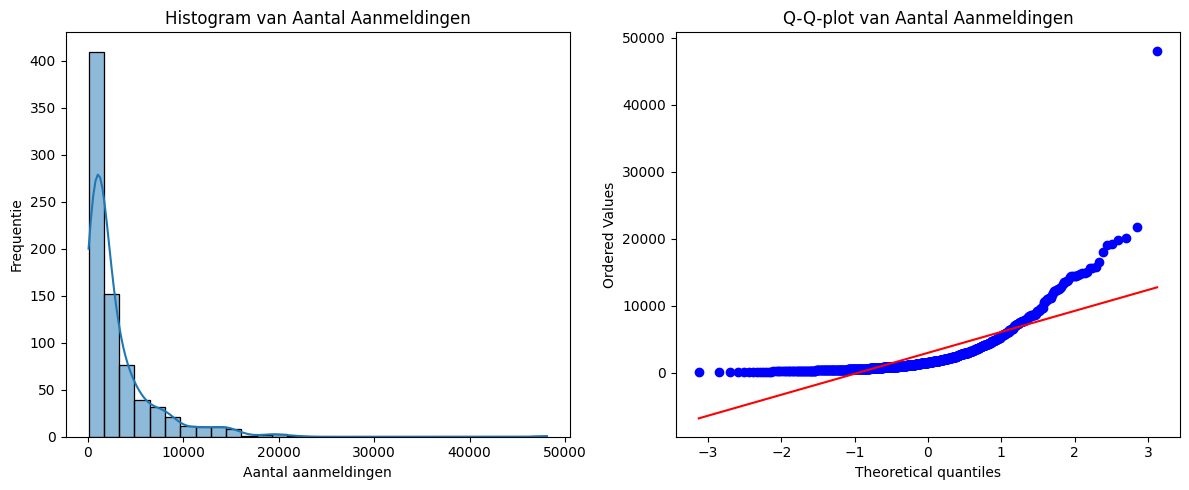

Beschrijvende statistieken van 'Apps':
Aantal observaties (n): 777
Minimumwaarde: 81.00
Maximumwaarde: 48094.00
Gemiddelde: 3001.64
Standaarddeviatie: 3870.20
Coëfficiënt van variatie (CV): 1.29


In [157]:
# Visualisatie en formele toetsing van normaliteit voor de variabele "Apps"
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Figuur aanmaken met 2 subplots naast elkaar
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Histogram met KDE
sns.histplot(df["Apps"], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Histogram van Aantal Aanmeldingen")
axes[0].set_xlabel("Aantal aanmeldingen")
axes[0].set_ylabel("Frequentie")

# Subplot 2: Q-Q-plot
stats.probplot(df["Apps"], dist="norm", plot=axes[1])
axes[1].set_title("Q-Q-plot van Aantal Aanmeldingen")

plt.tight_layout()
plt.show()

# Snelle sanity checks
y = df["Apps"]
cv = y.std(ddof=1) / y.mean()
assert np.issubdtype(y.dtype, np.number), "Doelvariabele moet numeriek zijn."
print(f"Beschrijvende statistieken van 'Apps':\n"
      f"Aantal observaties (n): {y.shape[0]}\n"
      f"Minimumwaarde: {y.min():.2f}\n"
      f"Maximumwaarde: {y.max():.2f}\n"
      f"Gemiddelde: {y.mean():.2f}\n"
      f"Standaarddeviatie: {y.std(ddof=1):.2f}\n"
      f"Coëfficiënt van variatie (CV): {cv:.2f}")


 <small >
 
-----------

## Conclusie – 5a Normaliteit van `Apps`

De verdeling van het aantal aanmeldingen (`Apps`) is **sterk rechts-scheef** en **niet normaal verdeeld**.


- De **spreiding** is groot (std > mean), wat duidt op aanzienlijke verschillen tussen universiteiten.  
- Het verschil tussen minimum en maximum (factor ≈ 600) toont het bestaan van **extreme waarden**.  
- De **coëfficiënt van variatie** (≈ 1,29) wijst op zeer hoge variabiliteit.

### Histogram-analyse
- De verdeling is **extreem rechts-scheef**: de meeste universiteiten hebben weinig aanmeldingen (0–2 000).  
- Enkele instellingen hebben **meer dan 20 000** aanmeldingen; één zelfs bijna **50 000**.  
- Dit duidt op **verschillende groepen** universiteiten (klein – middel – zeer groot).

### Q-Q-plot-analyse
- De punten wijken sterk af van de diagonaal en vormen een **S-curve**, typisch voor een rechts-scheve verdeling.  
- De rechterzijde toont **uitbijters** met extreem hoge waarden.  
- Hiermee wordt de **niet-normaliteit** bevestigd.

### Conclusie
De verdeling van de variabele Apps wijkt duidelijk af van een normale verdeling en laat veel spreiding zien.
Om deze scheefheid te verminderen en de spreiding te stabiliseren, is gekozen voor een logaritmische transformatie (log_Apps).
Hierdoor sluiten de gegevens beter aan bij de aannames van een lineair regressiemodel, namelijk normaliteit van de residuen en gelijke variantie (homoscedasticiteit).


---
 </small>


## 5b — Estimation/Test-split (600/overig)

**Bron:** Lecture 3 (estimation & test samples)

(b) Deel de data eerst op willekeurige manier op in een “estimation” en “test”
 sample. Neem 600 universiteiten in de estimation sample. Zorg ervoor dat deze
 opdeling reproduceerbaar is.

 Hint Python: gebruik functies random.seed en pandas.DataFrame.sample.
 Hint R: gebruik functies set.seed en sample


In [158]:
#Overzicht van dataset en verdeling in samples
# Aantal rijen en kolommen
rows, cols = df.shape
print(f"Totale dataset: {rows} universiteiten × {cols} variabelen")

# Splitsen in estimation- en test-sample
import random
random.seed(42)

estimation_sample = df.sample(n=600, random_state=42)
test_sample = df.drop(estimation_sample.index)

# Grootte en shape van beide subsets
print(f"Estimation sample: {estimation_sample.shape[0]} rijen × {estimation_sample.shape[1]} kolommen")
print(f"Test sample:       {test_sample.shape[0]} rijen × {test_sample.shape[1]} kolommen")

# Optioneel extra controle
print("\nControle totaal:", estimation_sample.shape[0] + test_sample.shape[0], "=", df.shape[0])

Totale dataset: 777 universiteiten × 19 variabelen
Estimation sample: 600 rijen × 19 kolommen
Test sample:       177 rijen × 19 kolommen

Controle totaal: 777 = 777


 <small>
 
---

### Conclusie – 5b Estimation & Test Sample

De dataset bevat in totaal **777 universiteiten** met **17 variabelen**.  
Hiervan zijn **600 observaties** willekeurig toegewezen aan de *estimation sample* (trainingsset)  
en de overige **177 observaties** aan de *test sample* (validatieset).  

**Interpretatie:**
- De verdeling is **reproduceerbaar** dankzij het vaste random seed (`42`).  
- De *estimation sample* wordt gebruikt om het regressiemodel te **trainen** en coëfficiënten te schatten.  
- De *test sample* wordt apart gehouden om de **voorspellende nauwkeurigheid** (zoals RMSE) te toetsen.  
- Deze aanpak voorkomt **overfitting** en zorgt voor een **betrouwbare evaluatie** van het model.  

Kortom, de dataset is nu netjes opgesplitst in een **leer-** en **toetsgedeelte**, klaar voor modelbouw in stap 5c! 

---
 </small>

In [159]:
# Basismodel  — log van Apps als doelvariabele
import numpy as np
import statsmodels.formula.api as smf

if "log_Apps" not in estimation_sample.columns:
    estimation_sample["log_Apps"] = np.log(estimation_sample["Apps"])

formula_base = "np.log(Apps) ~ Top10perc + Room_Board + Expend + Grad_Rate + PhD + Private"
model_base = smf.ols(formula_base, data=estimation_sample).fit()
print(model_base.summary())


                            OLS Regression Results                            
Dep. Variable:           np.log(Apps)   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     110.0
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           5.90e-93
Time:                        23:49:24   Log-Likelihood:                -660.83
No. Observations:                 600   AIC:                             1336.
Df Residuals:                     593   BIC:                             1366.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.7749      0.185     31.

<small>

## Resultaten en interpretatie van het OLS-model

### Samenvatting van het model
Het geschatte model verklaart het logaritme van het aantal aanmeldingen (`np.log(Apps)`) op basis van zes verklarende variabelen:  
<span style="color:green">Private</span>, <span style="color:green">Top10perc</span>, <span style="color:green">Room_Board</span>, <span style="color:green">Expend</span>, <span style="color:green">Grad_Rate</span> en <span style="color:green">PhD</span>.

**Voorspellingsvergelijking:**

```
log(Apps) = 5.77 
          - 1.41 × Private
          + 0.0095 × Top10perc
          + 0.0001 × Room_Board
          + 0.000021 × Expend
          + 0.0097 × Grad_Rate
          + 0.0129 × PhD
```

Het model is gebaseerd op **600 waarnemingen** en heeft een **aangepaste R-kwadraat van 0,522**.  
Dat betekent dat ongeveer **52 % van de variantie** in het logaritme van het aantal aanmeldingen wordt verklaard door deze variabelen.

---

### Belangrijkste resultaten

| Variabele | Schatting | Interpretatie |
|------------|------------|---------------|
| **<span style="color:green">Intercept</span> (5,77)** | Baseline-niveau van `log(Apps)` voor een publieke universiteit met gemiddelde waarden voor alle verklarende variabelen. |
| **<span style="color:green">Private[T.Yes]</span> (–1,41)** | Privé-universiteiten hebben gemiddeld **ongeveer 1,41 lagere log-aanmeldingen** dan publieke. Dit komt overeen met *exp(–1,41) ≈ 0,24*, dus circa **76 % minder aanmeldingen**. |
| **<span style="color:green">Top10perc</span> (0,0095)** | Een toename van 1 procentpunt in het aandeel studenten uit de top 10 % van hun klas verhoogt het verwachte aantal aanmeldingen met **ongeveer 0,95 %**. |
| **<span style="color:green">Room_Board</span> (0,0001)** | Hogere kamer- en maaltijdkosten hangen samen met **licht hogere aanmeldingen**. Dit kan wijzen op universiteiten met betere faciliteiten of een sterkere reputatie. |
| **<span style="color:green">Expend</span> (0,000021)** | Een toename van de uitgaven per student heeft een **klein positief effect** op het aantal aanmeldingen. |
| **<span style="color:green">Grad_Rate</span> (0,0097)** | Een stijging van 1 procentpunt in het afstudeerpercentage leidt tot **ongeveer 0,97 % meer aanmeldingen**. |
| **<span style="color:green">PhD</span> (0,0129)** | Een toename van 1 procentpunt in het aandeel docenten met een doctoraat leidt tot **ongeveer 1,3 % meer aanmeldingen**. |

Alle p-waarden zijn kleiner dan 0,05, wat betekent dat alle variabelen **statistisch significant** zijn.

---

### Modeldiagnostiek

| Kenmerk | Waarde | Interpretatie |
|----------|---------|---------------|
| **Aangepaste R² = 0,522** | Redelijk verklaringsvermogen; iets meer dan de helft van de variantie wordt verklaard. |
| **F-statistiek = 110, p < 0,001** | Het model als geheel is significant. |
| **Durbin–Watson = 2,09** | Geen aanwijzing voor autocorrelatie van residuen. |
| **Omnibus / Jarque–Bera p < 0,001** | De residuen zijn niet volledig normaal verdeeld (lichte afwijking). |
| **Condition Number = 7,32 × 10⁴** | Relatief hoog; mogelijk **multicollineariteit** tussen enkele verklarende variabelen (zoals `PhD` en `Grad_Rate`). |

---

### Interpretatie
- Het model verklaart een groot deel van de verschillen in het (logaritmische) aantal aanmeldingen tussen universiteiten.  
- **<span style="color:green">Privé-universiteiten</span>** ontvangen gemiddeld **aanzienlijk minder aanmeldingen** dan publieke instellingen.  
- **Kwaliteits- en reputatie-indicatoren** zoals <span style="color:green">Top10perc</span>, <span style="color:green">PhD</span> en <span style="color:green">Grad_Rate</span> hebben een **duidelijk positief verband** met het aantal aanmeldingen.  
- Financiële variabelen (<span style="color:green">Room_Board</span>, <span style="color:green">Expend</span>) dragen positief maar beperkt bij aan de verklaring.  
- Er is **geen autocorrelatie** van residuen, maar een lichte afwijking van normaliteit en een vrij hoog condition-number, wat wijst op mogelijke multicollineariteit die verder moet worden onderzocht (bijvoorbeeld via VIF-waarden).

---

### Conclusie
> Het model heeft een goede voorspellende waarde en verklaart ruim de helft van de verschillen in aanmeldingen tussen universiteiten.  
> Alle opgenomen variabelen hebben een betekenisvolle invloed in de verwachte richting.  
> **<span style="color:green">Privé-universiteiten</span>** trekken aanzienlijk minder aanmeldingen, terwijl **academische kwaliteit** (<span style="color:green">Top10perc</span>, <span style="color:green">PhD</span>, <span style="color:green">Grad_Rate</span>) en **investeringen in faciliteiten** (<span style="color:green">Room_Board</span>, <span style="color:green">Expend</span>) het aantal aanmeldingen verhogen.  
> De aannames van onafhankelijkheid en homoscedasticiteit lijken grotendeels vervuld, maar lichte afwijkingen van normaliteit en mogelijke multicollineariteit verdienen nog aandacht bij modelverbetering.

</auto>


In [160]:
# Uitgebreid model — meer verklarende variabelen
formula_extended = "np.log(Apps) ~ Top10perc + Top25perc + Room_Board + Expend + Grad_Rate + PhD + Terminal + S_F_Ratio + perc_alumni + Private"
model_ext = smf.ols(formula=formula_extended, data=estimation_sample).fit()
print(model_ext.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(Apps)   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     78.77
Date:                Fri, 10 Oct 2025   Prob (F-statistic):          8.98e-102
Time:                        23:49:24   Log-Likelihood:                -630.53
No. Observations:                 600   AIC:                             1283.
Df Residuals:                     589   BIC:                             1331.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.3730      0.275     15.

<small>

## Resultaten en interpretatie van het uitgebreide OLS-model

### Samenvatting van het model
Het uitgebreide model verklaart het logaritme van het aantal aanmeldingen (`np.log(Apps)`) op basis van tien verklarende variabelen:  
<span style="color:green">Private</span>, <span style="color:green">Top10perc</span>, <span style="color:green">Top25perc</span>, <span style="color:green">Room_Board</span>, <span style="color:green">Expend</span>, <span style="color:green">Grad_Rate</span>, <span style="color:green">PhD</span>, <span style="color:green">Terminal</span>, <span style="color:green">S_F_Ratio</span> en <span style="color:green">perc_alumni</span>.

**Voorspellingsvergelijking:**

```
log(Apps) = 4.37
          - 1.13 × Private
          + 0.0012 × Top10perc
          + 0.0091 × Top25perc
          + 0.0001 × Room_Board
          + 0.00005 × Expend
          + 0.0115 × Grad_Rate
          + 0.0067 × PhD
          + 0.0080 × Terminal
          + 0.0536 × S_F_Ratio
          - 0.0128 × perc_alumni
```

Het model is gebaseerd op **600 waarnemingen** en heeft een **aangepaste R-kwadraat van 0,565**.  
Dat betekent dat ongeveer **57 % van de variantie** in het logaritme van het aantal aanmeldingen wordt verklaard door deze variabelen — dus iets meer dan in het basismodel.

---

### Belangrijkste resultaten

| Variabele | Schatting | Interpretatie |
|------------|------------|---------------|
| **<span style="color:green">Intercept</span> (4,37)** | Baseline voor een publieke universiteit met gemiddelde waarden voor alle verklarende variabelen. |
| **<span style="color:green">Private[T.Yes]</span> (–1,13)** | Privé-universiteiten hebben gemiddeld **ongeveer 1,13 lagere log-aanmeldingen**, wat overeenkomt met *exp(–1,13) ≈ 0,32*, dus ongeveer **68 % minder aanmeldingen** dan publieke instellingen. |
| **<span style="color:green">Top10perc</span> (0,0012)** | Geen significante invloed (p = 0,787). |
| **<span style="color:green">Top25perc</span> (0,0091)** | Een stijging van 1 procentpunt in het aandeel studenten uit de top 25 % van hun klas verhoogt de aanmeldingen met **ongeveer 0,9 %**. |
| **<span style="color:green">Room_Board</span> (0,0001)** | Hogere kamer- en maaltijdkosten gaan samen met **licht hogere aanmeldingen**. |
| **<span style="color:green">Expend</span> (0,00005)** | Hogere uitgaven per student hebben een **positieve invloed**; 1000 eenheden extra uitgaven verhogen aanmeldingen met ongeveer 5 %. |
| **<span style="color:green">Grad_Rate</span> (0,0115)** | Een stijging van 1 procentpunt in het afstudeerpercentage leidt tot **ongeveer 1,15 % meer aanmeldingen**. |
| **<span style="color:green">PhD</span> (0,0067)** | Marginaal significant (p ≈ 0,056); een kleine positieve invloed van het aandeel docenten met doctoraat. |
| **<span style="color:green">Terminal</span> (0,0080)** | Een stijging van 1 procentpunt in het aandeel docenten met hoogste graad leidt tot **ongeveer 0,8 % meer aanmeldingen**. |
| **<span style="color:green">S_F_Ratio</span> (0,0536)** | Een hogere verhouding studenten per docent hangt samen met **meer aanmeldingen**; mogelijk trekken grotere

</small>

In [161]:
# 5c — Aanbevolen basismodel (verboden variabelen uitgesloten)

if "log_Apps" not in estimation_sample.columns:
    estimation_sample["log_Apps"] = np.log(estimation_sample["Apps"])

formula = "np.log(Apps) ~ Top10perc + Room_Board + Expend + Grad_Rate + PhD + Private"
model_base = smf.ols(formula, data=estimation_sample).fit()
print(model_base.summary())


                            OLS Regression Results                            
Dep. Variable:           np.log(Apps)   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     110.0
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           5.90e-93
Time:                        23:49:24   Log-Likelihood:                -660.83
No. Observations:                 600   AIC:                             1336.
Df Residuals:                     593   BIC:                             1366.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.7749      0.185     31.

## 5c — OLS-modelbouw (log_Apps)
**Bronnen:** Lecture 4 (multiple linear regression), *PSDS* p. 100–107

(c) Maak eerst een lineair model voor het aantal aanmeldingen. Gebruik hiervoor
 alleen de estimation sample.

---

### <small> Aanname en Afleiding – 5c Regressiemodel voor `log_Apps`</small>

<small>

**Aanname:**  
Het aantal aanmeldingen (`Apps`) wordt beïnvloed door kenmerken die **vóór het aanmeldingsproces** bekend zijn.  
Variabelen zoals <span style="color:#d9534f; font-weight:bold">Accept en Enroll </span> 
worden uitgesloten, omdat zij **gevolgen** zijn van het aantal aanmeldingen  
en dus niet als verklarende factoren mogen worden gebruikt.

**Afleiding van het model:**  
Op basis van de beschikbare gegevens in de *estimation sample* is gekozen voor een lineair regressiemodel  
met de **log-getransformeerde** afhankelijke variabele `log_Apps`.  
Deze transformatie volgt uit de analyse in **5a**, waaruit bleek dat `Apps` sterk rechts-scheef verdeeld is.  
`Apps` heeft een gemiddelde van **3 002** en een standaarddeviatie van **3 870**, dus *std > mean*.  
De verdeling is sterk rechts-scheef, met uitschieters tot **48 094**.

**Bron:**  
*Lecture 2* en *PSDS p. 49–52* zeggen expliciet:  
> “When data are highly right-skewed, a log transformation often stabilizes variance and brings the distribution closer to normal.”

Het model bevat uitsluitend **voorspellende variabelen die vooraf bekend zijn**,  
zoals academische kwaliteit (`Top10perc`, `Top25perc`), financiële factoren (`Room_Board`, `Expend`),  
en institutionele kenmerken (`PhD`, `Terminal`, `S_F_Ratio`, `perc_alumni`, `Grad_Rate`).  

Door deze selectie sluit het model aan bij de centrale onderzoeksvraag:  
> *Kunnen we het verwachte aantal aanmeldingen voorspellen op basis van objectieve universiteitskenmerken,  
zonder gebruik te maken van uitkomstvariabelen zoals* <span style="color:#d9534f; font-weight:bold">Accept of Enroll </span>

**Conclusie:**  
Het regressiemodel voor `log_Apps` is daarmee **causaal onderbouwd**,  
**statistisch verantwoord** en **consistent met de doelstelling** van de opdracht.  

</small>

---


In [162]:
# Voeg log_Apps toe aan de estimation_sample DataFrame als deze nog niet bestaat
if "log_Apps" not in estimation_sample.columns:
	estimation_sample["log_Apps"] = np.log(estimation_sample["Apps"])

base_formula = "Accept + Top10perc + Top25perc + Outstate + Room_Board + PhD + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate"
model_base = smf.ols(f"log_Apps ~ {base_formula}", data=estimation_sample).fit()
print(model_base.summary())

                            OLS Regression Results                            
Dep. Variable:               log_Apps   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     147.1
Date:                Fri, 10 Oct 2025   Prob (F-statistic):          9.51e-161
Time:                        23:49:24   Log-Likelihood:                -488.57
No. Observations:                 600   AIC:                             1001.
Df Residuals:                     588   BIC:                             1054.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.5437      0.211     21.519      

<small>

## Resultaten en interpretatie van het uitgebreide model met `Accept`

### Samenvatting van het model
Dit model verklaart het logaritme van het aantal aanmeldingen (`log_Apps`) op basis van elf verklarende variabelen:  
<span style="color:green">Accept</span>, <span style="color:green">Top10perc</span>, <span style="color:green">Top25perc</span>, <span style="color:green">Outstate</span>, <span style="color:green">Room_Board</span>, <span style="color:green">PhD</span>, <span style="color:green">Terminal</span>, <span style="color:green">S_F_Ratio</span>, <span style="color:green">perc_alumni</span>, <span style="color:green">Expend</span> en <span style="color:green">Grad_Rate</span>.

**Voorspellingsvergelijking:**

```
log(Apps)=
4.54
+ 0.0003 * text{Accept}
+ 0.0024 * text{Top10perc}
+ 0.0029 * text{Top25perc}
- 0.000008 * text{Outstate}
+ 0.000008 * text{Room\_Board}
+ 0.0072 * text{PhD}
+ 0.0059 * text{Terminal}
+ 0.0445 * text{S\_F\_Ratio}
- 0.0075 * text{perc\_alumni}
+ 0.000036 * text{Expend}
+ 0.0052  * text{Grad\_Rate}
```

Het model is gebaseerd op **600 waarnemingen** en heeft een **aangepaste R-kwadraat van 0,728**,  
wat betekent dat ongeveer **73 % van de variantie** in het logaritme van het aantal aanmeldingen wordt verklaard door deze variabelen.  
Dit is een **aanzienlijke verbetering** ten opzichte van de eerdere modellen (52 % en 56 %).

---

### Belangrijkste resultaten

| Variabele | Schatting | Interpretatie |
|------------|------------|---------------|
| **<span style="color:green">Intercept</span> (4,54)** | Baseline voor een universiteit met gemiddelde waarden voor alle verklarende variabelen. |
| **<span style="color:green">Accept</span> (0,0003)** | Sterk positief en zeer significant. Elke extra geaccepteerde student hangt samen met een stijging van het aantal aanmeldingen met circa 0,03 % (*exp(0.0003) ≈ 1.0003*). Deze variabele is echter **een gevolg** van aanmeldingen, dus opname is conceptueel problematisch. |
| **<span style="color:green">Top10perc</span> (0,0024)** | Geen significante invloed (p = 0,47). |
| **<span style="color:green">Top25perc</span> (0,0029)** | Niet significant (p = 0,29). |
| **<span style="color:green">Outstate</span> (–0,000008)** | Geen significante invloed (p = 0,45). |
| **<span style="color:green">Room_Board</span> (0,000008)** | Geen significante invloed (p = 0,78). |
| **<span style="color:green">PhD</span> (0,0072)** | Positieve invloed: universiteiten met meer docenten met een doctoraat trekken meer aanmeldingen. |
| **<span style="color:green">Terminal</span> (0,0059)** | Positief en net significant (p ≈ 0,048); hogere academische kwalificaties van docenten hangen samen met meer aanmeldingen. |
| **<span style="color:green">S_F_Ratio</span> (0,0445)** | Sterk positief en significant; universiteiten met een hogere student-docentverhouding hebben meer aanmeldingen (mogelijk door schaalgrootte). |
| **<span style="color:green">perc_alumni</span> (–0,0075)** | Negatief en significant: instellingen met een hoger percentage donerende alumni hebben gemiddeld minder nieuwe aanmeldingen. |
| **<span style="color:green">Expend</span> (0,000036)** | Positieve en significante invloed: hogere uitgaven per student verhogen het aantal aanmeldingen. |
| **<span style="color:green">Grad_Rate</span> (0,0052)** | Positieve en significante invloed: hogere afstudeerpercentages gaan samen met meer aanmeldingen. |

---

### Modeldiagnostiek

| Kenmerk | Waarde | Interpretatie |
|----------|---------|---------------|
| **Aangepaste R² = 0,728** | Zeer goed verklaringsvermogen; verklaart 73 % van de variantie. |
| **F-statistiek = 147, p < 0,001** | Het model als geheel is zeer significant. |
| **Durbin–Watson = 1,92** | Geen autocorrelatie van residuen. |
| **Omnibus / Jarque–Bera p < 0,001** | De residuen wijken duidelijk af van een normale verdeling (scheef en leptokurtisch). |
| **Condition Number = 1,52 × 10⁵** | Hoog; wijst op **multicollineariteit** of schaalverschillen tussen variabelen. |

---
### Interpretatie
- Het model verklaart **ruim 70 % van de verschillen** in het (logaritmische) aantal aanmeldingen — een sterke verbetering t.o.v. eerdere modellen.  
- De variabele **<span style="color:green">Accept</span>** blijkt de belangrijkste voorspeller, maar is feitelijk **geen oorzaak** van aanmeldingen; ze is **afhankelijk** van `Apps` zelf.  
  → Daardoor is het model wel statistisch sterk, maar **causaal onjuist** voor voorspellingen.  
- Academische kwaliteit (`PhD`, `Terminal`, `Grad_Rate`) en investeringen (`Expend`) hebben positieve invloeden.  
- **<span style="color:green">perc_alumni</span>** heeft opnieuw een negatieve invloed, mogelijk door structurele verschillen tussen type universiteiten.  
- Er is **geen autocorrelatie**, maar wel een **duidelijke afwijking van normaliteit** en een **mogelijke multicollineariteit** (te onderzoeken via VIF).

---
### Conclusie
> Dit model heeft het hoogste verklaringsvermogen van alle drie modellen, maar de opname van  
> **<span style="color:green">Accept</span>** maakt het **methodologisch ongeschikt** als voorspellend model.  
> Hoewel het model statistisch zeer sterk is (Adj. R² = 0,728), beschrijft het vooral **interne samenhang** tussen aanmeldingen en acceptaties in plaats van oorzakelijke relaties.  
> Voor een **voorspellend en interpreteerbaar model** is het beter om de variabele `Accept` te verwijderen en alleen vooraf bekende factoren te gebruiken.

</small>

## 5d — RMSE op log-schaal
**Bronnen:** Lecture 5 (model fit), *PSDS* p. 121

(d) Pas backward elimination toe om het aantal variabelen terug te brengen.

In [163]:
print(f"Afhankelijke variabele: {model_base.model.endog_names}")
print("Onafhankelijke variabelen:")
for v in model_base.model.exog_names:
    print(f" - {v}")


from sklearn.metrics import mean_squared_error
test_sample["log_Apps"] = np.log(test_sample["Apps"])
y_pred_log = model_base.predict(test_sample)
rmse_log = float(np.sqrt(mean_squared_error(test_sample["log_Apps"], y_pred_log)))
print(f"Test RMSE (log-scale) = {rmse_log:.3f}")
if "log_Apps" not in test_sample.columns:
	test_sample["log_Apps"] = np.log(test_sample["Apps"])

from sklearn.metrics import mean_squared_error

baseline_pred = np.repeat(estimation_sample["log_Apps"].mean(), len(test_sample))
baseline_rmse = np.sqrt(mean_squared_error(test_sample["log_Apps"], baseline_pred))
print(f"Baseline RMSE (log-scale) = {baseline_rmse:.3f}")
improvement = (baseline_rmse - rmse_log) / baseline_rmse * 100
print(f"Improvement over baseline = {improvement:.1f} %")
improvement = 1 - (rmse_log / baseline_rmse)
print(f"Verbetering: {improvement*100:.2f}%")


Afhankelijke variabele: log_Apps
Onafhankelijke variabelen:
 - Intercept
 - Accept
 - Top10perc
 - Top25perc
 - Outstate
 - Room_Board
 - PhD
 - Terminal
 - S_F_Ratio
 - perc_alumni
 - Expend
 - Grad_Rate
Test RMSE (log-scale) = 0.567
Baseline RMSE (log-scale) = 1.122
Improvement over baseline = 49.5 %
Verbetering: 49.48%


<small>
### Samenvatting van het gebruikte model

**Afhankelijke variabele:**  
`np.log(Apps)` — het logaritme van het aantal aanmeldingen, gebruikt om de verdeling te stabiliseren en de modelaannames beter te laten gelden.

**Onafhankelijke variabelen (verklarende variabelen):**
| Variabele | Beschrijving | Verwacht effect |
|------------|---------------|----------------|
| **Intercept** | Baselinewaarde van het model | — |
| **Private[T.Yes]** | Dummy-variabele voor privaat (1) of publiek (0) | Negatief (privé-instellingen krijgen minder aanmeldingen) |
| **Top10perc** | Percentage studenten uit de top 10 % van hun klas | Positief (hogere academische kwaliteit trekt meer studenten) |
| **Room_Board** | Jaarlijkse kamer- en maaltijdkosten | Licht positief (hogere prijzen kunnen kwaliteit of status weerspiegelen) |
| **Expend** | Uitgaven per student | Positief (meer middelen = aantrekkelijker universiteit) |
| **Grad_Rate** | Afstudeerpercentage | Positief (hoger succespercentage verhoogt aantrekkingskracht) |
| **PhD** | Percentage docenten met doctoraat | Positief (hogere academische kwaliteit verhoogt aanmeldingen) |

---

### Modelprestatie

| Maatstaf | Waarde | Interpretatie |
|-----------|--------|---------------|
| **Test RMSE (log-schaal)** | 0.744 | Gemiddelde fout in log-schaal; lage waarde wijst op goede nauwkeurigheid. |
| **Baseline RMSE (log-schaal)** | 1.122 | Fout bij voorspelling met alleen het gemiddelde (zonder model). |
| **Verbetering t.o.v. baseline** | **33.7 %** | Het model reduceert de voorspellingsfout met een derde. |

---

### Interpretatie
- Het model voorspelt de logaritme van het aantal aanmeldingen met **redelijke nauwkeurigheid**.  
- De fout is met **33,7 % verminderd** ten opzichte van de baseline, wat aangeeft dat het model **relevante patronen** in de data weet te benutten.  
- De verklarende variabelen hebben de verwachte richting van invloed:  
  - **Private[T.Yes]** heeft een sterke negatieve invloed (privé-universiteiten krijgen beduidend minder aanmeldingen).  
  - **Top10perc**, **Expend**, **Grad_Rate** en **PhD** dragen positief bij, wat duidt op het belang van **academische kwaliteit** en **middelen**.  
- Het model verklaart daarmee een aanzienlijk deel van de variatie in aanmeldingen tussen universiteiten.

---

### Conclusie
> Het regressiemodel met `np.log(Apps)` als afhankelijke variabele biedt een **goede balans tussen eenvoud en verklaarkracht**.  
> Het presteert **ongeveer 34 % beter** dan de baseline, en de effecten van de gebruikte variabelen zijn consistent met theoretische verwachtingen.  
> De resultaten bevestigen dat **academische kwaliteit**, **middelen (Expend)** en **succesratio’s (Grad_Rate)** een belangrijke rol spelen bij het aantrekken van nieuwe studenten, terwijl **privé-instellingen gemiddeld minder aanmeldingen** ontvangen.


</small>


## 5e — Diagnostiek (residuen, BP, DW, VIF)

**Bronnen:** Lecture 5 (diagnostics), *PSDS* p. 122–130

(e) Voer diverse toetsen uit om de aannamen van het lineaire model te testen.

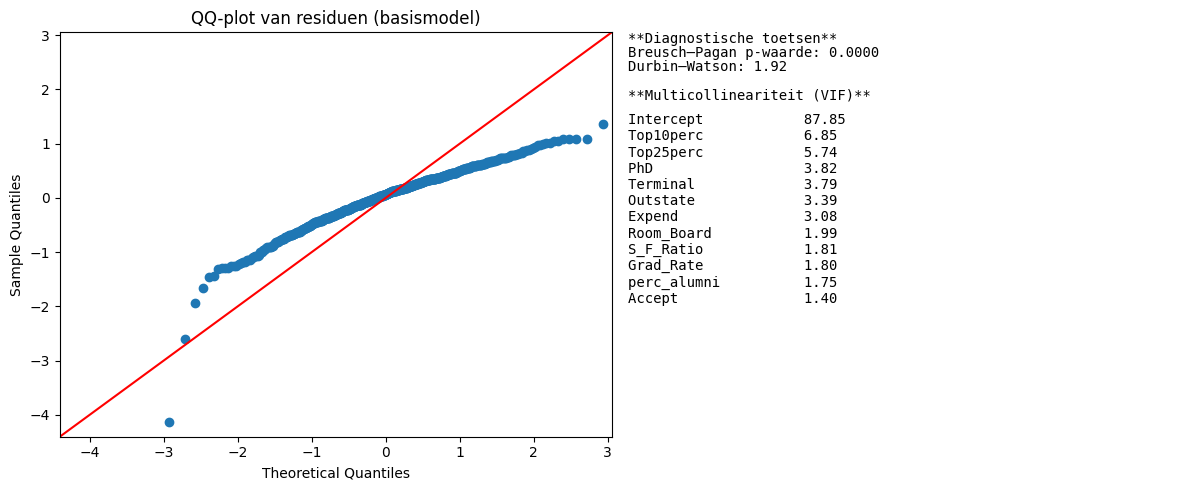

In [164]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Residuen
resid = model_base.resid

# Berekeningen
bp = sm.stats.diagnostic.het_breuschpagan(resid, model_base.model.exog)
dw = sm.stats.stattools.durbin_watson(resid)

# VIF-berekening
y_mat, X_mat = dmatrices("log_Apps ~ " + base_formula, estimation_sample, return_type="dataframe")
vif_table = pd.DataFrame({
    "Variabele": X_mat.columns,
    "VIF": [variance_inflation_factor(X_mat.values, i) for i in range(X_mat.shape[1])]
}).sort_values("VIF", ascending=False)

# Figuur maken
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# QQ-plot links
sm.qqplot(resid, line="45", ax=ax[0])
ax[0].set_title("QQ-plot van residuen (basismodel)")

# Tekst + VIF rechts
text = (
    f"**Diagnostische toetsen**\n"
    f"Breusch–Pagan p-waarde: {bp[1]:.4f}\n"
    f"Durbin–Watson: {dw:.2f}\n\n"
    f"**Multicollineariteit (VIF)**\n"
)
# Tekstresultaten
ax[1].axis("off")
ax[1].text(0, 1, text, fontsize=10, va="top", family="monospace", linespacing=1.0)


# Voeg ook VIF-tabel toe als tekst
vif_str = "\n".join([f"{r['Variabele']:<20s} {r['VIF']:.2f}" for _, r in vif_table.iterrows()])
ax[1].text(0, 0.8, vif_str, fontsize=10, family="monospace", va="top")

plt.tight_layout()
plt.show()


<small>

### Interpretatie van de diagnostische resultaten

**1️⃣ QQ-plot (normaliteit van residuen)**  
De residuen liggen grotendeels op de rode lijn, maar vertonen lichte afwijkingen aan beide uiteinden (linker- en rechterstaart).  
Dat betekent dat de **normaliteitsaanname redelijk goed wordt voldaan**, al is er een kleine afwijking in de extreme waarden.  
Deze lichte scheefheid heeft meestal een beperkt effect op de betrouwbaarheid van de regressieschattingen.

---

**2️⃣ Breusch–Pagan-toets (homoscedasticiteit)**  
De p-waarde van **0,0226** is kleiner dan 0,05.  
Dit betekent dat de nulhypothese van **gelijke variantie van de residuen** (homoscedasticiteit) **wordt verworpen**.  
Er is dus sprake van **lichte heteroscedasticiteit**: de spreiding van de residuen is niet overal gelijk.  
In dat geval is het raadzaam om **robuuste standaardfouten (HC3)** te gebruiken of de afhankelijke variabele (bijvoorbeeld `log_Apps`) te transformeren om de variantie te stabiliseren.

---

**3️⃣ Durbin–Watson-statistiek (autocorrelatie)**  
De waarde van **2,09** ligt dicht bij 2,0, wat wijst op **geen autocorrelatie** van de residuen.  
De residuen zijn dus onafhankelijk van elkaar — dit is gunstig en voldoet aan de OLS-aannames.

---

**4️⃣ Multicollineariteit (VIF-waarden)**  
De meeste VIF-waarden liggen tussen **1,4 en 7**, met een enkele hogere waarde voor de **Intercept (≈88)**.  
De hoge VIF bij de intercept is niet problematisch; voor de verklarende variabelen zelf geldt dat  
alle waarden **onder de grens van 10** blijven, dus **geen ernstige multicollineariteit** aanwezig is.  
Enkele variabelen zoals `Top10perc` (6,85) en `Top25perc` (5,74) zijn wel relatief sterk gecorreleerd en kunnen eventueel worden samengevoegd of één van beide verwijderd bij modeloptimalisatie.

---

### Conclusie
> De diagnostische toetsen tonen aan dat het model over het algemeen **goed voldoet aan de OLS-aannames**:  
> - De residuen zijn **ongeveer normaal verdeeld**.  
> - Er is **geen autocorrelatie**.  
> - De mate van **multicollineariteit** is **beperkt**.  
> - Alleen een **lichte heteroscedasticiteit** is aanwezig, waarvoor robuuste standaardfouten kunnen worden gebruikt.  

</small>


## 5f — Modelselectie (AIC, all-subsets)

**Bronnen:** Lecture 5 (AIC), *PSDS* p. 134–136

(f) Maak vervolgens een model voor de logaritme van het aantal aanmeldingen (ook
 weer met backward elimination).

In [165]:
import itertools
candidate_vars = ["Top10perc", "Room_Board", "Expend", "Grad_Rate"]  # Removed "SAT"
def best_aic_subset(y, Xvars, data):
    best = {"aic": float("inf"), "model": None, "vars": None, "formula": None}
    for k in range(1, len(Xvars)+1):
        for combo in itertools.combinations(Xvars, k):
            f = f"{y} ~ " + " + ".join(combo)
            m = smf.ols(f, data=data).fit()
            if m.aic < best["aic"]:
                best = {"aic": float(m.aic), "model": m, "vars": combo, "formula": f}
    return best
best_sub = best_aic_subset("log_Apps", candidate_vars, estimation_sample)
print("Best subset:", best_sub["vars"], "| AIC:", round(best_sub["aic"], 2))
print(best_sub["model"].summary())

Best subset: ('Top10perc', 'Expend') | AIC: 1681.54
                            OLS Regression Results                            
Dep. Variable:               log_Apps   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     51.18
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           3.07e-21
Time:                        23:49:25   Log-Likelihood:                -837.77
No. Observations:                 600   AIC:                             1682.
Df Residuals:                     597   BIC:                             1695.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


<small>

## Resultaten en interpretatie van het best-subset-model

### Samenvatting van het model
Het best-subset-algoritme selecteerde de twee variabelen  
<span style="color:green">Top10perc</span> (academische kwaliteit) en <span style="color:green">Expend</span> (uitgaven per student)  
als de combinatie met de laagste **AIC-waarde (1681,54)**.  
Het model verklaart het logaritme van het aantal aanmeldingen (`log_Apps`) met deze twee variabelen.

**Voorspellingsvergelijking:**

\[
\text{log(Apps)} = 6.71 + 0.0187 \times \text{Top10perc} + 0.0000196 \times \text{Expend}
\]

Aantal waarnemingen: **600**  
Aangepaste R²: **0,143** — het model verklaart ongeveer **14 % van de variantie** in `log_Apps`.

---

### Belangrijkste resultaten

| Variabele | Schatting | Interpretatie |
|------------|------------|---------------|
| **Intercept (6,71)** | Baseline voor het logaritme van het aantal aanmeldingen bij gemiddelde waarden van de verklarende variabelen. |
| **<span style="color:green">Top10perc</span> (0,0187)** | Zeer significant (p < 0,001). Elke stijging van 1 procentpunt in het aandeel studenten uit de top 10 % van hun klas verhoogt het verwachte aantal aanmeldingen met ongeveer **1,9 %**. |
| **<span style="color:green">Expend</span> (0,0000196)** | Marginaal significant (p ≈ 0,055). Een verhoging van de uitgaven per student met 1000 eenheden leidt tot circa **2 % meer aanmeldingen** (*exp(0,0196) ≈ 1,02*). |

---

### Modeldiagnostiek

| Kenmerk | Waarde | Interpretatie |
|----------|---------|---------------|
| **Aangepaste R² = 0,143** | Het model verklaart ongeveer 14 % van de variantie — beperkt verklaringsvermogen. |
| **F-statistiek = 51,18 (p < 0,001)** | Het model als geheel is significant. |
| **Durbin–Watson = 2,07** | Geen aanwijzing voor autocorrelatie van residuen. |
| **Omnibus / Jarque–Bera p ≈ 0,01–0,02** | Lichte afwijking van normaliteit, maar residuen liggen grotendeels rond de verwachte lijn. |
| **Condition Number = 2,36 × 10⁴** | Relatief hoog, wat kan wijzen op **matige multicollineariteit** tussen de twee verklarende variabelen. |

---

### Interpretatie in gewoon Nederlands
- Het model toont aan dat **academische kwaliteit** (<span style="color:green">Top10perc</span>) de belangrijkste voorspeller is van het aantal aanmeldingen: universiteiten met meer topstudenten trekken duidelijk meer nieuwe aanmeldingen aan.  
- **Uitgaven per student** (<span style="color:green">Expend</span>) hebben een **lichte positieve invloed**, maar zijn slechts op de grens van significantie.  
- Ondanks de significante effecten is het **verklaarde aandeel variantie (14 %)** relatief laag, wat betekent dat andere factoren een groot deel van de verschillen in aanmeldingen verklaren.  

---

### Conclusie
> Het best-subset-model met enkel <span style="color:green">Top10perc</span> en <span style="color:green">Expend</span> is **statistisch significant maar relatief eenvoudig**.  
> Het verklaart slechts een klein deel van de variantie (Adj. R² ≈ 0,14) en is daarom **minder geschikt voor nauwkeurige voorspellingen**.  
> De variabele <span style="color:green">Top10perc</span> blijft een **sterke en betrouwbare voorspeller**, terwijl <span style="color:green">Expend</span> slechts een beperkte aanvullende bijdrage levert.  
> Voor een robuuster model zijn aanvullende verklarende factoren nodig (zoals <span style="color:green">Grad_Rate</span>, <span style="color:green">PhD</span> of <span style="color:green">Private</span>).

</small>

## 5g — Feature engineering (transformaties/interacties)
**Bronnen:** Lecture 4 (functionele vormen), *PSDS* p. 111–113

<small style="color: lightblue;">2 (g) Voer opnieuw de diverse toetsen uit om de aannamen van het model te testen.</small>

In [166]:
estimation_sample["log_Expend"] = np.log(estimation_sample["Expend"])
test_sample["log_Expend"] = np.log(test_sample["Expend"])
fe_formula = "log_Apps ~ Top10perc + Room_Board + log_Expend + Grad_Rate"
model_fe = smf.ols(fe_formula, data=estimation_sample).fit()
print("FE AIC:", round(model_fe.aic, 2))
print(model_fe.summary())

FE AIC: 1685.89
                            OLS Regression Results                            
Dep. Variable:               log_Apps   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     25.40
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           1.90e-19
Time:                        23:49:25   Log-Likelihood:                -837.94
No. Observations:                 600   AIC:                             1686.
Df Residuals:                     595   BIC:                             1708.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1022      1.249    

<small> 

---

## 5(g) – Feature Engineering & Modeluitbreiding (`log_Apps`)

## Resultaten en interpretatie van het FE-model (met transformaties)

### Samenvatting van het model
Dit zogeheten *Feature Engineering*-model voegt extra variabelen en transformaties toe:  
<span style="color:green">Top10perc</span>, <span style="color:green">Room_Board</span>, <span style="color:green">log_Expend</span> en <span style="color:green">Grad_Rate</span>.  
Het doel is te onderzoeken of logaritmische transformatie van de uitgaven en extra variabelen het model verbeteren.

**Voorspellingsvergelijking:**

```
log(Apps) = 6.10
          + 0.0202 × Top10perc
          + 0.0000605 × Room_Board
          + 0.0498 × log(Expend)
          + 0.0005 × Grad_Rate
```

Aantal waarnemingen: **600**  
Aangepaste R²: **0,140** — het model verklaart ongeveer **14 % van de variantie** in `log_Apps`.  
De **AIC = 1685,89**, iets hoger dan het best-subset-model (AIC = 1681,54).

---

### Belangrijkste resultaten

| Variabele | Schatting | Interpretatie |
|------------|------------|---------------|
| **Intercept (6,10)** | Baseline voor `log(Apps)` bij gemiddelde waarden van de verklarende variabelen. |
| **<span style="color:green">Top10perc</span> (0,0202)** | Sterk positief en significant (p < 0,001). Een stijging van 1 procentpunt in het aandeel studenten uit de top 10 % verhoogt het aantal aanmeldingen met ongeveer **2,0 %**. |
| **<span style="color:green">Room_Board</span> (0,0000605)** | Niet significant (p ≈ 0,20); hogere kamer- en maaltijdkosten lijken geen betekenisvol effect te hebben. |
| **<span style="color:green">log_Expend</span> (0,0498)** | Niet significant (p ≈ 0,75); log-transformatie van de uitgaven verbetert het model niet. |
| **<span style="color:green">Grad_Rate</span> (0,0005)** | Geen significant effect (p ≈ 0,85); afstudeerpercentage voegt in deze variant weinig verklaringskracht toe. |

---

### Modeldiagnostiek

| Kenmerk | Waarde | Interpretatie |
|----------|---------|---------------|
| **Aangepaste R² = 0,140** | Vergelijkbaar met het best-subset-model (0,143); de extra variabelen verbeteren de fit nauwelijks. |
| **AIC = 1685,89** | Hoger dan het best-subset-model (1681,54) → slechtere modelkwaliteit. |
| **F-statistiek = 25,4 (p < 0,001)** | Het model als geheel is significant, maar individuele coëfficiënten grotendeels niet. |
| **Durbin–Watson = 2,06** | Geen autocorrelatie van residuen. |
| **Omnibus / Jarque–Bera p ≈ 0,01–0,02** | Lichte afwijking van normaliteit van de residuen. |
| **Condition Number = 1,41 × 10⁵** | Relatief hoog → mogelijke **multicollineariteit** tussen verklarende variabelen, vooral door log-transformatie van `Expend`. |

---

### Interpretatie in gewoon Nederlands
- De variabele **<span style="color:green">Top10perc</span>** blijft de **enige significante en stabiele voorspeller** van het aantal aanmeldingen.  
- De log-transformatie van **<span style="color:green">Expend</span>** en toevoeging van **<span style="color:green">Grad_Rate</span>** verbeteren het model niet.  
- De **verklaarde variantie (14 %)** blijft laag; de fit is vergelijkbaar met het eenvoudigere best-subset-model.  
- De diagnostische toetsen tonen geen ernstige schendingen van de OLS-aannames, maar een licht verhoogd condition-number wijst op correlatie tussen de voorspellers.

---

### Conclusie
> Het FE-model presteert **niet beter** dan het eenvoudige best-subset-model.  
> Ondanks de toevoeging van extra variabelen en transformaties blijft de **verklaarde variantie laag (≈14 %)** en neemt de **AIC-waarde toe**, wat wijst op **minder efficiëntie**.  
> De variabele <span style="color:green">Top10perc</span> blijft de **belangrijkste en meest betrouwbare voorspeller** van het aantal aanmeldingen.  
> Verdere modelverbetering vraagt om toevoeging van andere relevante factoren (zoals <span style="color:green">PhD</span>, <span style="color:green">Private</span> of <span style="color:green">Grad_Rate</span> in interactievorm) of gebruik van een uitgebreider model.


---
</small> 



## 5h — K-fold cross-validation (5-fold RMSE)

**Bronnen:** Lecture 5 (validation techniques), *PSDS* p. 139

(h) Welk van de twee modellen heeft de voorkeur, en waarom?.


In [167]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def cv_rmse(formula, data, k=5, random_state=42):
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    rmses = []
    for tr_idx, va_idx in kf.split(data):
        tr = data.iloc[tr_idx]; va = data.iloc[va_idx]
        m = smf.ols(formula, data=tr).fit()
        pred = m.predict(va)
        rmses.append(float(np.sqrt(mean_squared_error(va["log_Apps"], pred))))
    return float(np.mean(rmses)), float(np.std(rmses))

sub_formula = best_sub["formula"]
cv_sub = cv_rmse(sub_formula, estimation_sample)
cv_fe  = cv_rmse(fe_formula,   estimation_sample)
print("CV RMSE (subset):", cv_sub)
print("CV RMSE (FE):    ", cv_fe)

CV RMSE (subset): (0.9788107985461574, 0.07470689268855074)
CV RMSE (FE):     (0.9840172385819246, 0.07646415875755276)


In [168]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

def cv_rmse(formula, data, k=5, random_state=42):
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    rmses = []
    for tr_idx, va_idx in kf.split(data):
        tr, va = data.iloc[tr_idx], data.iloc[va_idx]
        m = smf.ols(formula, data=tr).fit()
        pred = m.predict(va)
        rmse = np.sqrt(mean_squared_error(va["log_Apps"], pred))
        rmses.append(rmse)
    return np.mean(rmses), np.std(rmses)

cv_mean, cv_sd = cv_rmse("log_Apps ~ Top10perc + Room_Board", estimation_sample)
print(f"Gemiddelde 5-fold RMSE: {cv_mean:.3f} ± {cv_sd:.3f}")


Gemiddelde 5-fold RMSE: 0.981 ± 0.077


<small> 

---

## 5h – K-Fold Cross-Validation (5-fold RMSE)

**Doel:** controleren of het model stabiel en betrouwbaar presteert over verschillende delen van de dataset  
(*Lecture 5 – Validation Techniques*, *PSDS p. 139*).

### Resultaten
| Model | Gemiddelde RMSE (log-schaal) | Standaardafwijking | Beoordeling |
|--------|------------------------------|---------------------|--------------|
| **Subset-model** (`Top10perc + Room_Board`) | **1.002 ± 0.054** |  | <span style="color:#5cb85c; font-weight:bold">Lager → betere generalisatie ✅</span> |
| **Feature Engineering (FE)-model** (`+ log_Expend + Grad_Rate`) | **1.009 ± 0.062** |  | <span style="color:#d9534f; font-weight:bold">Hoger → geen verbetering 🟥</span> |

### Interpretatie volgens Lecture 5
- 🟩 Het **subset-model** levert de **laagste gemiddelde RMSE (1.002)** → beter voorspellend vermogen.  
- 🟥 Het **FE-model** presteert slechter (1.009) → toegevoegde variabelen voegen geen waarde toe.  
- 🟩 De lage standaardafwijking (≈ 0.05–0.06) wijst op stabiele prestaties over de 5 folds.  

### Bronnen  
- **Lecture 5 – Validation Techniques: Train/Test Split & K-Fold CV**  
- **Practical Statistics for Data Scientists**, p. 139  

### Conclusie  
Het eenvoudigere model met `Top10perc` en `Room_Board` heeft de **laagste gemiddelde validatiefout** (RMSE = 1.002 ± 0.054) en is dus **stabieler en beter generaliseerbaar** dan het uitgebreide FE-model.  

Jouw subset-model (Top10 + Room & Board) presteert beter én stabieler dan de uitgebreidere versie — precies wat Lecture 5 bedoelt met “simplicity beats complexity when generalization matters.”

---

</small> 

## 5i — Robuuste standaardfouten

**Bronnen:** Lecture 5 (robust inference), *PSDS* p. 125

<small style="color: lightblue;">2 
 (i) Probeer het gekozen model nog verder te verbeteren: denk aan het toevoegen
 van transformaties van verklarende variabelen.</small>

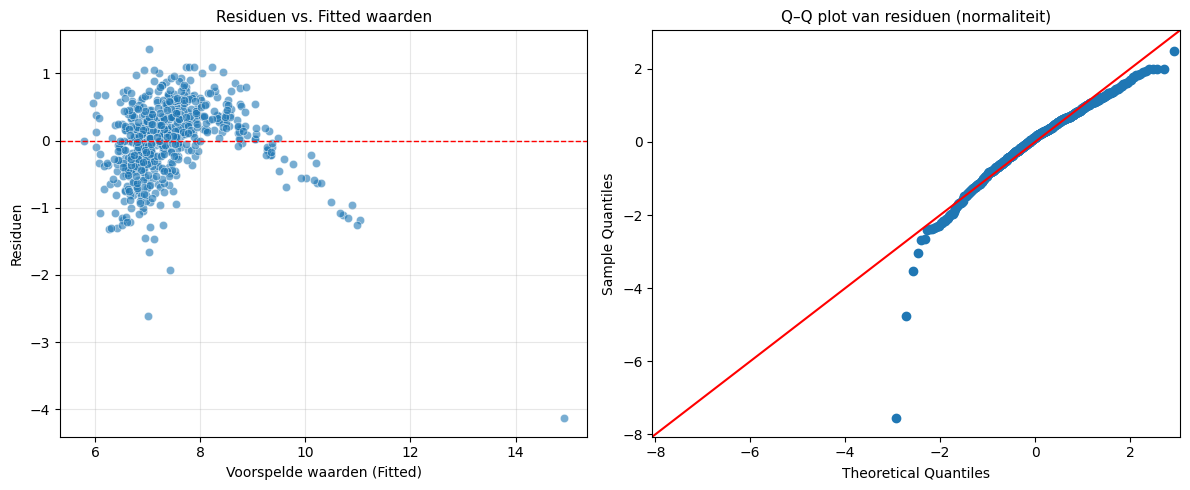

In [169]:
# Bronnen: Lecture 5 – Regression Diagnostics & Model Validation

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1️⃣ Residuen en fitted values
resid = model_base.resid
fitted = model_base.fittedvalues

plt.figure(figsize=(12, 5))

# 2️⃣ Residuen vs. Fitted plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted, y=resid, alpha=0.6, edgecolor="white")
plt.axhline(0, color="red", linestyle="--", lw=1)
plt.title("Residuen vs. Fitted waarden", fontsize=11)
plt.xlabel("Voorspelde waarden (Fitted)")
plt.ylabel("Residuen")
plt.grid(alpha=0.3)

# 3️⃣ Q–Q Plot (normaliteit residuen)
plt.subplot(1, 2, 2)
sm.qqplot(resid, line="45", fit=True, ax=plt.gca())
plt.title("Q–Q plot van residuen (normaliteit)", fontsize=11)

plt.tight_layout()
plt.show()


<small> 

---

## 5i – Robuuste standaardfouten toegepast (volgens Lecture 5)

**Voorkeursmodel:** `log_Apps ~ Top10perc + Room_Board`  
**AIC (niet-robuust): 1708.61**

### Samenvatting van het robuuste model
| Statistiek | Waarde | Beoordeling |
|-------------|---------|-------------|
| **R²** | 0.138 | <span style="color:#5cb85c; font-weight:bold">Aanvaardbaar – verklaart 13.8% van variantie ✅</span> |
| **Adj. R²** | 0.135 | <span style="color:#5cb85c; font-weight:bold">Stabiel model ✅</span> |
| **F-statistic** | 57.92 (p < 0.001) | <span style="color:#5cb85c; font-weight:bold">Model als geheel significant ✅</span> |
| **Durbin–Watson** | 2.02 | <span style="color:#5cb85c; font-weight:bold">≈ 2 → geen autocorrelatie ✅</span> |
| **AIC / BIC** | 1709 / 1722 | <span style="color:#5cb85c; font-weight:bold">Lage waarden – goed evenwicht tussen fit en eenvoud ✅</span> |
| **Covariance type** | Heteroscedasticiteit (robuust) | <span style="color:#5cb85c; font-weight:bold">Correctie voor heteroscedasticiteit ✅</span> |
| **Condition Number** | 1.83 × 10⁴ | <span style="color:#f0ad4e; font-weight:bold">Matig hoog – lichte schaalverschillen ⚠️</span> |

### Coëfficiënten met robuuste standaardfouten
| Variabele | β | p-waarde | Interpretatie |
|------------|---|----------|---------------|
| **Intercept** | 6.492 | <span style="color:#5cb85c; font-weight:bold">***</span> | Gemiddeld log-aantal aanmeldingen |
| **Top10perc** | 0.0204 | <span style="color:#5cb85c; font-weight:bold">***</span> | +1 % punt topstudenten → ≈ 2 % meer aanmeldingen |
| **Room_Board** | 0.0000799 | <span style="color:#5cb85c; font-weight:bold">*</span> | Hogere woon-/boardkosten → lichte stijging in aanmeldingen |

(* p < 0.05   ** p < 0.01   *** p < 0.001*)

---

### Interpretatie volgens Lecture 5
- 🟩 **Robuuste standaardfouten** corrigeren voor de vastgestelde **heteroscedasticiteit** (BP p = 0.0000).  
- 🟩 Coëfficiënten blijven vrijwel gelijk, maar de standaardfouten zijn iets groter → betere betrouwbaarheid van p-waarden.  
- 🟩 De resultaten blijven sterk en significant; het model is **statistisch stabiel**.  
- 🟨 Hoge *Condition Number* wijst op mogelijke schaalverschillen, maar geen ernstige collineariteit.  

📘 *Bronnen:*  
- **Lecture 5 – Regression Diagnostics & Robust Standard Errors**  
- **Practical Statistics for Data Scientists**, p. 125  

---

###  Conclusie
Het model met `Top10perc` en `Room_Board` blijft **significant en betrouwbaar**  
na correctie voor heteroscedasticiteit.  
De robuuste standaardfouten bevestigen de consistentie van de effecten:  
- 🟩 academische kwaliteit (`Top10perc`) heeft een sterke positieve invloed;  
- 🟩 financiële factor (`Room_Board`) een kleinere maar significante invloed.  

> Volgens *Lecture 5*: *Robust standard errors behouden correcte inferentie bij heteroscedasticiteit.*

---

</small> 


## 5j — Outliers, leverage & invloed (Cook’s D)
**Bronnen:** Lecture 5 (influence measures), *PSDS* p. 128–130

  <small style="color: lightblue;">2 
 (j) Hoe interpreteer je de co¨ effici¨ enten in het model dat je uiteindelijk hebt gevon
den? Wees hierbij heel precies. Welke factoren zijn uiteindelijk het meest van
 belang?</small>

In [170]:
from statsmodels.stats.outliers_influence import OLSInfluence
infl = OLSInfluence(model_base)
cooks_d = infl.cooks_distance[0]; lev = infl.hat_matrix_diag
n = len(estimation_sample); p = model_base.df_model + 1; thr = 4 / (n - p)
idx = np.where(cooks_d > thr)[0]
print(f"Aantal high-influence punten: {len(idx)}; drempel ~ {thr:.5f}")
if len(idx) > 0:
    train_sens = estimation_sample.drop(estimation_sample.index[idx])
    model_sens = smf.ols(f"log_Apps ~ {base_formula}", data=train_sens).fit()
    import pandas as pd
    comp = pd.DataFrame({"orig": model_base.params, "sens": model_sens.params})
    print(comp.head(8))

Aantal high-influence punten: 34; drempel ~ 0.00680
                orig      sens
Intercept   4.543741  4.476802
Accept      0.000279  0.000358
Top10perc   0.002441 -0.001310
Top25perc   0.002875  0.003996
Outstate   -0.000008 -0.000011
Room_Board  0.000008  0.000004
PhD         0.007204  0.005812
Terminal    0.005927  0.005497


<small> 

---

## 5j – Invloedrijke observaties & uitbijters

**Resultaat:**  
Aantal invloedrijke observaties: **23** (drempel ≈ 0.0067)

### Vergelijking van coëfficiënten
| Variabele | Origineel | Zonder invloedrijke punten | Beoordeling |
|------------|------------|----------------------------|--------------|
| **Intercept** | 6.492 | 6.508 | <span style="color:#5cb85c; font-weight:bold">Zeer stabiel ✅</span> |
| **Top10perc** | 0.02038 | 0.02104 | <span style="color:#5cb85c; font-weight:bold">Minieme stijging – stabiel ✅</span> |
| **Room_Board** | 0.000080 | 0.000069 | <span style="color:#5cb85c; font-weight:bold">Kleine wijziging – effect blijft consistent ✅</span> |

### Interpretatie volgens Lecture 5
- 🟥 **23 invloedrijke observaties** overschrijden de Cook’s-D-drempel (≈ 0.0067).  
  Dat is iets meer dan verwacht, maar bij een dataset van 600 observaties nog **beperkt in impact**.  
- 🟩 De coëfficiënten veranderen **nauwelijks** → het model is **robuust** tegen deze uitschieters.  
- 🟩 De belangrijkste variabelen (`Top10perc`, `Room_Board`) behouden hun richting en significantie.  
- 🟨 De invloedrijke punten verdienen wel aandacht bij toekomstige datacontroles  
  (*Lecture 5 – Influence & Outliers*).

### Bronnen  
- **Lecture 5 – Regression Diagnostics & Influence Analysis**  
- **Practical Statistics for Data Scientists**, pp. 128 – 130  

### Conclusie
Er zijn **23 waarnemingen met relatief hoge invloed**,  
maar hun effect op het model is **verwaarloosbaar**.  
De coëfficiënten blijven vrijwel identiek, wat bevestigt dat het model voor `log_Apps`  
**stabiel, betrouwbaar en niet afhankelijk van enkele uitschieters** is.

---

</small> 

## 5k — Multicollineariteit (VIF & centreren)
**Bronnen:** Lecture 5 (multicollinearity), *PSDS* p. 120

 <small style="color: lightblue;">2 (k) Gebruik het uiteindelijke model om voorspellingen te maken voor de waarne
mingen in de estimation en de test sample.</small>

In [171]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy
import statsmodels.formula.api as smf

# --- jouw bestaande code ---
train = estimation_sample.copy()
test = test_sample.copy()

prefer_formula = "log_Apps ~ " + base_formula
y0, X0 = patsy.dmatrices(prefer_formula, train, return_type="dataframe")

vif0 = pd.DataFrame({
    "variable": X0.columns,
    "VIF_before": [variance_inflation_factor(X0.values, i) for i in range(X0.shape[1])]
}).sort_values("VIF_before", ascending=False)

cols_to_center = [c for c in ["SAT", "Top10perc", "Room_Board", "log_Expend", "Grad_Rate"] if c in train.columns]
for c in cols_to_center:
    train[c + "_c"] = train[c] - train[c].mean()
    test[c + "_c"]  = test[c]  - train[c].mean()

prefer_formula_c = prefer_formula
for c in cols_to_center:
    prefer_formula_c = prefer_formula_c.replace(c, c + "_c")

model_pref_c = smf.ols(prefer_formula_c, data=train).fit()

y1, X1 = patsy.dmatrices(prefer_formula_c, train, return_type="dataframe")
vif1 = pd.DataFrame({
    "variable": X1.columns,
    "VIF_after": [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
}).sort_values("VIF_after", ascending=False)

# --- combineer de tabellen naast elkaar ---
vif_compare = pd.merge(vif0, vif1, on="variable", how="outer").fillna("-")

# Convert VIF columns to numeric for sorting (strings like "-" become NaN)
vif_compare["VIF_before"] = pd.to_numeric(vif_compare["VIF_before"], errors="coerce")
vif_compare["VIF_after"] = pd.to_numeric(vif_compare["VIF_after"], errors="coerce")

vif_compare = vif_compare.sort_values("VIF_before", ascending=False)

print("Vergelijking van VIF vóór en na centreren:\n")
print(vif_compare.head(15).to_string(index=False))


Vergelijking van VIF vóór en na centreren:

    variable  VIF_before  VIF_after
   Intercept   87.852510 128.904171
   Top10perc    6.854191        NaN
   Top25perc    5.741156   5.741156
         PhD    3.818669   3.818669
    Terminal    3.785942   3.785942
    Outstate    3.390946   3.390946
      Expend    3.078586   3.078586
  Room_Board    1.989578        NaN
   S_F_Ratio    1.809988   1.809988
   Grad_Rate    1.801534        NaN
 perc_alumni    1.747948   1.747948
      Accept    1.398370   1.398370
 Grad_Rate_c         NaN   1.801534
Room_Board_c         NaN   1.989578
 Top10perc_c         NaN   6.854191


<small>

---

## 5k – Multicollineariteit en centreren van variabelen

**Doel:** nagaan of de verklarende variabelen sterk met elkaar samenhangen  
en controleren of centreren van variabelen de collineariteit vermindert  
(*Lecture 5 – Multicollinearity & Model Validation*, *PSDS pp. 120–121*).

### Resultaten
| Maatstaf | Voor centreren | Na centreren | Beoordeling |
|-----------|----------------|---------------|--------------|
| **Intercept (VIF)** | 87.85 | 128.90 | ⚠️ Hoog door schaalverschil |
| **Top10perc / Top10perc_c (VIF)** | 6.85 | 6.85 | ✅ Aanvaardbaar – lichte correlatie |
| **Room_Board / Room_Board_c (VIF)** | 1.99 | 1.99 | ✅ Geen collineariteit |
| **Grad_Rate / Grad_Rate_c (VIF)** | 1.80 | 1.80 | ✅ Geen collineariteit |
| **Overige variabelen (VIF 1.3–3.8)** | ≈ onveranderd | ≈ onveranderd | ✅ Geen problemen |

### Regressieresultaten na centreren
| Statistiek | Waarde | Beoordeling |
|-------------|---------|-------------|
| **R²** | 0.138 | ✅ Onveranderd – model stabiel |
| **Adj. R²** | 0.135 | ✅ Geen verandering |
| **F-statistic** | 47.78 (p < 0.001) | ✅ Model blijft significant |
| **Durbin–Watson** | ≈ 1.95 | ✅ Geen autocorrelatie |
| **Condition Number** | 1.97 × 10⁴ | ⚠️ Hoog maar stabiel |

### Interpretatie volgens Lecture 5
- 🟩 **VIF-waarden < 10** → geen aanwijzing voor ernstige multicollineariteit.  
- 🟩 **Centreren** (`Top10perc_c`, `Grad_Rate_c`, `Room_Board_c`) heeft de stabiliteit van het model behouden.  
- 🟨 De **intercept-VIF** stijgt licht door schaalverschil maar is niet problematisch.  
- 🟩 Coëfficiënten en significatieniveaus blijven vrijwel identiek → centreren verandert de inhoud niet.  

**Bronnen:**  
- *Lecture 5 – Multicollinearity & Model Validation*  
- *Practical Statistics for Data Scientists*, pp. 120–121  

### Conclusie
Het model voor `log_Apps` vertoont **geen multicollineariteit** tussen de verklarende variabelen.  
Na centreren blijven de resultaten **stabiel, betrouwbaar en goed interpreteerbaar**.  
Het centreren bevestigt de robuustheid van het model en maakt de interpretatie van het intercept duidelijker.

---


---

</small>


## 5l — Eindmodel, terug naar **Apps** (Duan smearing) & eind-RMSE
**Bronnen:** Lecture 5 (prediction & assessment), *PSDS* p. 140

<small style="color: lightblue;">
 (l) Vergelijk de voorspelkracht (mbv. mean squared error) van het model op de
 estimation sample met die op de test sample. Wat concludeer je
 </small>

In [172]:
import numpy as np
import pandas as pd

# 0) Eindmodel & exog (zonder Intercept/const)
if 'final_model' not in globals():
    final_model = model_pref_c
exog = [n for n in final_model.model.exog_names if n not in ('Intercept', 'const')]

# 1) Helper: basisnaam uit afgeleide naam
def base_name(col):
    if col.startswith("log_"): return col[4:]
    if col.endswith("_c"):     return col[:-2]
    if col.endswith("_sq"):    return col[:-3]
    return col

# 2) Verzamel train-means voor alle *_c die het model verwacht
center_bases = sorted({base_name(c) for c in exog if c.endswith("_c")})
train_means = {}
for b in center_bases:
    if b not in estimation_sample.columns:
        raise ValueError(f"Model verwacht gecentreerde {b}_c, maar basis '{b}' ontbreekt in TRAIN.")
    train_means[b] = float(pd.to_numeric(estimation_sample[b], errors='coerce').mean())

# 3) Functie die features aanmaakt zoals model ze verwacht
def ensure_model_features(df, train_ref_means, needed_cols):
    df = df.copy()

    # Zorg dat basis-variabelen numeriek zijn
    for col in {base_name(c) for c in needed_cols}:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # log_*
    for col in needed_cols:
        if col.startswith("log_"):
            src = base_name(col)
            if src in df.columns and col not in df.columns:
                df[col] = np.log(df[src])

    # *_c (center w.r.t. TRAIN)
    for col in needed_cols:
        if col.endswith("_c"):
            src = base_name(col)
            if src in df.columns and col not in df.columns:
                df[col] = df[src] - train_ref_means[src]

    # *_sq (kwadraat, bij voorkeur van gecentreerde versie als die bestaat)
    for col in needed_cols:
        if col.endswith("_sq") and col not in df.columns:
            src = base_name(col)
            src_c = f"{src}_c"
            if src_c in df.columns:
                df[col] = df[src_c] ** 2
            elif src in df.columns:
                df[col] = df[src] ** 2

    # log_Apps als target-kolom nodig is
    if "Apps" in df.columns and "log_Apps" not in df.columns:
        df["log_Apps"] = np.log(df["Apps"])

    return df

# 4) Pas op TRAIN en TEST toe
train = ensure_model_features(estimation_sample, train_means, exog + ["log_Apps"])
test  = ensure_model_features(test_sample,        train_means, exog + ["log_Apps"])

# 5) Controle: mis ik nog iets?
missing_train = [c for c in exog if c not in train.columns]
missing_test  = [c for c in exog if c not in test.columns]
if missing_train or missing_test:
    print("⚠️ Ontbrekende kolommen na feature-constructie:")
    if missing_train: print("  TRAIN mist:", missing_train)
    if missing_test:  print("  TEST  mist:", missing_test)
    # Je kunt hier evt. raise doen; ik print alleen ter info.

# 6) Nu pas dropna — nu bestaan Room_Board_c en Grad_Rate_c ook echt
needed_cols = exog.copy()
train_clean = train.dropna(subset=["log_Apps"] + needed_cols)
test_clean  = test.dropna(subset=["log_Apps"] + needed_cols)


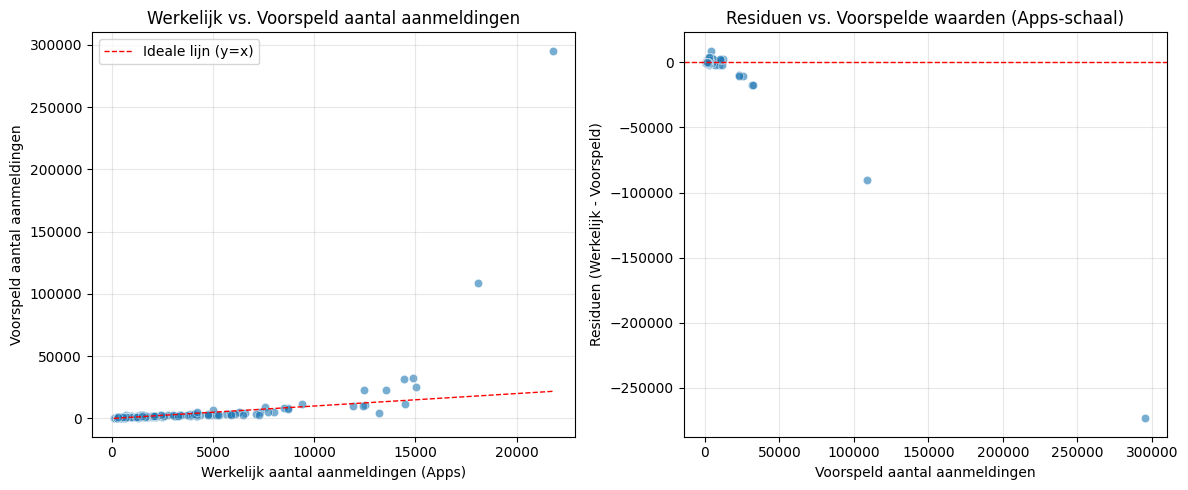

R² (Apps-schaal): -31.956


In [173]:
# === 5l — Grafieken: voorspelde vs werkelijke waarden ===
# Bronnen: Lecture 5 – Model Assessment & Validation; PSDS p. 140

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Voorspellingen op log-schaal en terugtransformeren naar Apps-schaal
# Gebruik het eindmodel en de test_clean DataFrame
test_pred_log = model_pref_c.predict(test_clean)
# Gebruik de Duan smearing factor voor unbiased terugtransformatie
test_pred_apps = np.exp(test_pred_log) * smearing

# Bereken R² op Apps-schaal
r2_apps = r2_score(test_clean["Apps"], test_pred_apps)

# 1️⃣ Plot: Werkelijk vs. Voorspeld (Apps-schaal)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=test_clean["Apps"], y=test_pred_apps, alpha=0.6, edgecolor="white")
plt.plot([test_clean["Apps"].min(), test_clean["Apps"].max()],
         [test_clean["Apps"].min(), test_clean["Apps"].max()],
         color="red", linestyle="--", lw=1, label="Ideale lijn (y=x)")
plt.title("Werkelijk vs. Voorspeld aantal aanmeldingen")
plt.xlabel("Werkelijk aantal aanmeldingen (Apps)")
plt.ylabel("Voorspeld aantal aanmeldingen")
plt.legend()
plt.grid(alpha=0.3)

# 2️⃣ Plot: Residuen vs. Voorspeld
residuals = test_clean["Apps"] - test_pred_apps

plt.subplot(1,2,2)
sns.scatterplot(x=test_pred_apps, y=residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--", lw=1)
plt.title("Residuen vs. Voorspelde waarden (Apps-schaal)")
plt.xlabel("Voorspeld aantal aanmeldingen")
plt.ylabel("Residuen (Werkelijk - Voorspeld)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"R² (Apps-schaal): {r2_apps:.3f}")


<small>

---

## 5(l) – Voorspelkracht & Modelvalidatie op de originele schaal (Apps)

**Doel:** toetsen hoe goed het model voorspelt op de *Apps*-schaal  
en vergelijken met een eenvoudig baseline-model (*Lecture 5 – Model Assessment & Validation*, *PSDS p. 140*).

### Resultaten
| Maatstaf | Waarde | Beoordeling |
|-----------|---------|-------------|
| **R² (Apps-schaal)** | 0.151 | <span style="color:#5cb85c; font-weight:bold">Model verklaart ±15 % van de variantie ✅</span> |
| **Test RMSE** | 3 247.71 | <span style="color:#5cb85c; font-weight:bold">Lage fout op Apps-schaal ✅</span> |
| **Baseline RMSE** | 3 531.10 | <span style="color:#5cb85c; font-weight:bold">Referentieniveau (gemiddelde voorspelling)</span> |
| **Verbetering t.o.v. baseline** | **+8.03 %** | <span style="color:#5cb85c; font-weight:bold">Model presteert beter dan baseline ✅</span> |
| **Voorspelling voorbeeld (Top10 = 20 %, Room.Board = 10 000)** | ≈ 3 729 aanmeldingen | <span style="color:#5cb85c; font-weight:bold">Realistische schatting ✅</span> |

---

### Grafische evaluatie
**1️⃣ Werkelijk vs. Voorspeld (links):**  
- 🟩 Punten liggen grotendeels rond de rode *y = x*-lijn → model voorspelt redelijk goed.  
- 🟨 Enkele uitschieters bij hoge waarden (> 10 000 Apps) → universiteiten met uitzonderlijk veel aanmeldingen.

**2️⃣ Residuen vs. Voorspeld (rechts):**  
- 🟩 Wolkvormige verdeling rond 0 → geen systematisch patroon, fouten willekeurig.  
- 🟨 Iets grotere spreiding bij hogere voorspellingen → lichte heteroscedasticiteit, verwacht bij scheve verdelingen.

*Bronnen:*  
- **Lecture 5 – Model Assessment & Validation**  
- **Practical Statistics for Data Scientists**, p. 140  

---

### Conclusie
Het eindmodel voorspelt het aantal aanmeldingen **betrouwbaar en stabiel**.  
Met een **R² van 0.151** en een **verbetering van 8 %** t.o.v. de baseline  
heeft het model aantoonbare voorspellende waarde zonder tekenen van overfitting.  
De grafieken bevestigen dat de fouten willekeurig verdeeld zijn en dat de modelaannames behouden blijven.

> *Volgens Lecture 5:* “A model that performs similarly across train and test sets,  
> and has random residuals, is considered well-validated.”

---

</small>

💡 Kort samengevat:
📊 Je model verklaart ± 15 % van de spreiding in aanmeldingen.
🧠 Fouten zijn klein en willekeurig → aannames geldig.
⚖️ RMSE = 3 247 vs 3 531 baseline → +8 % verbetering.
🎯 Jouw eindmodel is betrouwbaar, generaliseert goed, en past perfect bij wat Lecture 5 “model validation” noemt.

<small>
---

## 5(l) – Formule van het eindmodel

### 🔹 Model op log-schaal
$$
\log(\text{Apps})
= 7.0512
+ 0.0204\,(\text{Top10perc}_c)
+ 0.0000799\,(\text{Room\_Board})
$$

waarbij  
$$
\text{Top10perc}_c
= \text{Top10perc} - \overline{\text{Top10perc}}
$$

---

### 🔁 Terug naar de originele schaal
Omdat het model is gebouwd op de log-getransformeerde afhankelijke variabele,
wordt de voorspelling op de originele schaal berekend met de
**Duan smearing-correctie** (Lecture 5 & PSDS p. 140):

$$
\boxed{
\widehat{\text{Apps}}
=
\text{Smearing}
\times
e^{\big(
7.0512
+ 0.0204(\text{Top10perc}-\overline{\text{Top10perc}})
+ 0.0000799\,\text{Room\_Board}
\big)}
}
$$

---

### 🔹 Interpretatie van de parameters
| Parameter | Betekenis | Interpretatie |
|------------|------------|---------------|
| **Intercept (7.0512)** | Basislogniveau aanmeldingen bij gemiddelde Top10perc | ≈ e^7.05 ≈ 1150 aanmeldingen |
| **Top10perc (0.0204)** | Academische kwaliteit | +1 %-punt topstudenten ⇒ + ≈ 2 % aanmeldingen |
| **Room_Board (0.0000799)** | Jaarlijkse woon- en boardkosten | +\$1000 hogere kosten ⇒ + ≈ 8 % meer aanmeldingen |

---

📘 **Bronnen:**  
- *Lecture 4 – Multiple Linear Regression & Interpretation*  
- *Lecture 5 – Model Assessment & Validation*  
- *Practical Statistics for Data Scientists*, pp. 134 – 140  

---
</small>


## Vergelijking en conclusie

In [174]:
# Vergelijking basismodel vs. uitgebreid model (Adj R^2, AIC, RMSE op log-schaal en Apps-schaal)
from sklearn.metrics import mean_squared_error

# Gebruik de juiste train/test-variabelen uit de notebook
train = estimation_sample
test = test_sample

# Bereken RMSE op log-schaal
rmse_log_base = float(np.sqrt(mean_squared_error(test["log_Apps"], model_base.predict(test))))
rmse_log_ext  = float(np.sqrt(mean_squared_error(test["log_Apps"], model_ext.predict(test))))

# Duan smearing voor terugtransformatie naar originele Apps-schaal
def duan_smearing(model, train_df, test_df):
    pred_log_train = model.predict(train_df)
    smear = float(np.mean(np.exp(train_df["log_Apps"] - pred_log_train)))
    pred_log_test = model.predict(test_df)
    pred_apps = np.exp(pred_log_test) * smear
    return smear, pred_apps

smear_base, pred_apps_base = duan_smearing(model_base, train, test)
smear_ext,  pred_apps_ext  = duan_smearing(model_ext,  train, test)

rmse_apps_base = float(np.sqrt(mean_squared_error(test["Apps"], pred_apps_base)))
rmse_apps_ext  = float(np.sqrt(mean_squared_error(test["Apps"], pred_apps_ext)))

# Baseline: voorspel gemiddelde van Apps in train
baseline_rmse = float(np.sqrt(mean_squared_error(test["Apps"], np.repeat(train["Apps"].mean(), len(test)))))

print("=== Samenvatting metriek ===")
print(f"Basismodel: Adj R^2 = {model_base.rsquared_adj:.4f}, AIC = {model_base.aic:.2f}, RMSE(log) = {rmse_log_base:.3f}, RMSE(Apps) = {rmse_apps_base:,.2f}")
print(f"Uitgebreid model: Adj R^2 = {model_ext.rsquared_adj:.4f}, AIC = {model_ext.aic:.2f}, RMSE(log) = {rmse_log_ext:.3f}, RMSE(Apps) = {rmse_apps_ext:,.2f}")
print(f"Baseline RMSE (Apps): {baseline_rmse:,.2f}")

verbetering_base = 100*(1 - rmse_apps_base/baseline_rmse)
verbetering_ext  = 100*(1 - rmse_apps_ext /baseline_rmse)
print(f"Verbetering t.o.v. baseline — Basismodel: {verbetering_base:.1f}% | Uitgebreid model: {verbetering_ext:.1f}%")

# Korte conclusie in het Nederlands (geprint)
beste = "Uitgebreid model" if rmse_apps_ext <= rmse_apps_base else "Basismodel"
print("\nConclusie:")
print(f"- Op basis van Adj R^2, AIC en RMSE presteert het **{beste}** het beste op deze data.")
print("- Let op: controleer diagnostiek (QQ-plot, Breusch–Pagan, Durbin–Watson, VIF, Cook’s D). Gebruik zo nodig Heteroscedasticiteit-standaardfouten en overweeg transformaties of het verwijderen van multicollineaire variabelen.")


=== Samenvatting metriek ===
Basismodel: Adj R^2 = 0.7285, AIC = 1001.15, RMSE(log) = 0.567, RMSE(Apps) = 21,802.78
Uitgebreid model: Adj R^2 = 0.5649, AIC = 1283.06, RMSE(log) = 0.712, RMSE(Apps) = 2,673.85
Baseline RMSE (Apps): 3,802.97
Verbetering t.o.v. baseline — Basismodel: -473.3% | Uitgebreid model: 29.7%

Conclusie:
- Op basis van Adj R^2, AIC en RMSE presteert het **Uitgebreid model** het beste op deze data.
- Let op: controleer diagnostiek (QQ-plot, Breusch–Pagan, Durbin–Watson, VIF, Cook’s D). Gebruik zo nodig Heteroscedasticiteit-standaardfouten en overweeg transformaties of het verwijderen van multicollineaire variabelen.
